In [46]:
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [47]:
titanic = sns.load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Target : Survive
## Redondante : pclass/class sex+age/who sex+age/adult_male embarked/embarked_town survive/alive 

In [48]:
titanic.shape

(891, 15)

In [49]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [50]:
titanic.dtypes.value_counts()

object      5
int64       4
float64     2
bool        2
category    1
category    1
dtype: int64

In [51]:
df = titanic

df.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

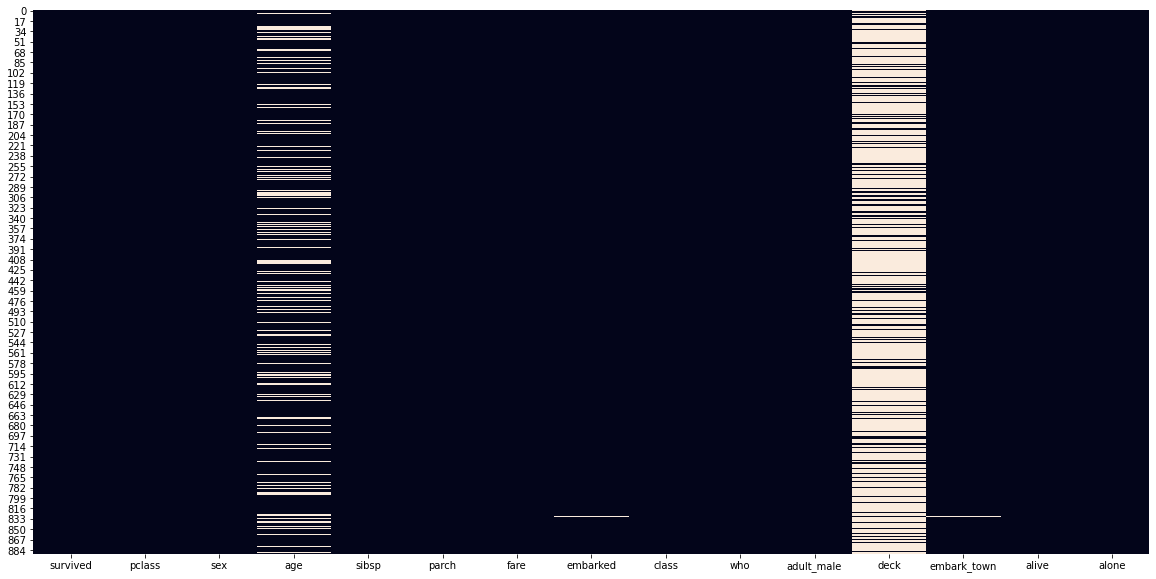

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [53]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=True)

survived       0.000000
pclass         0.000000
sex            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
who            0.000000
adult_male     0.000000
alive          0.000000
alone          0.000000
embarked       0.002245
embark_town    0.002245
age            0.198653
deck           0.772166
dtype: float64

In [54]:
df['survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

<AxesSubplot:ylabel='survived'>

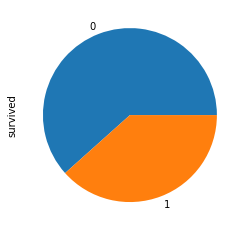

In [55]:
df['survived'].value_counts().plot.pie()

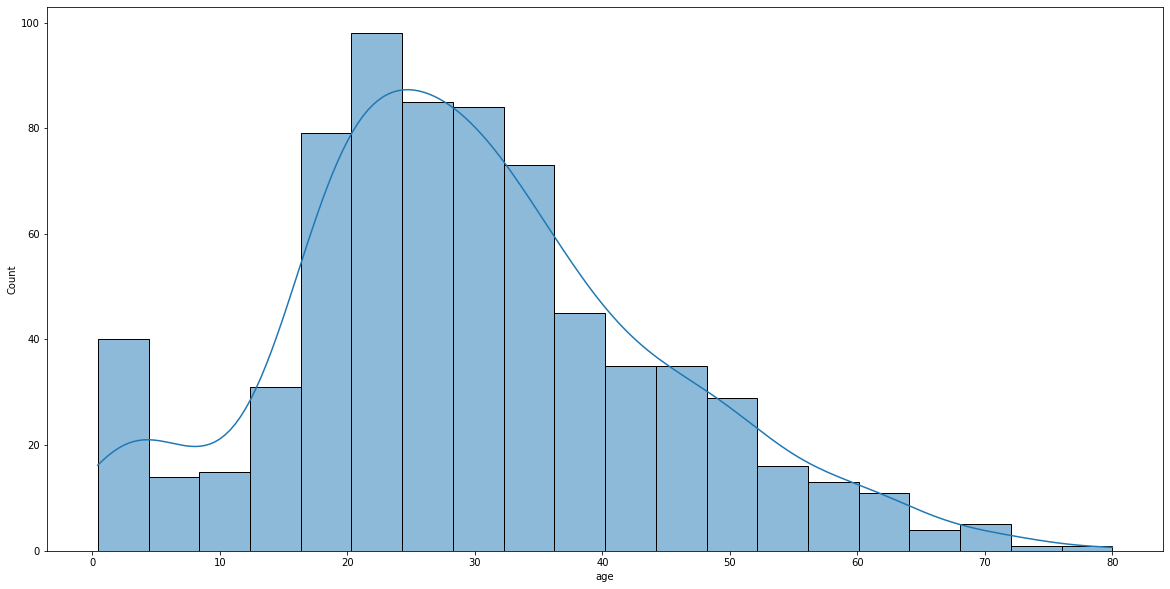

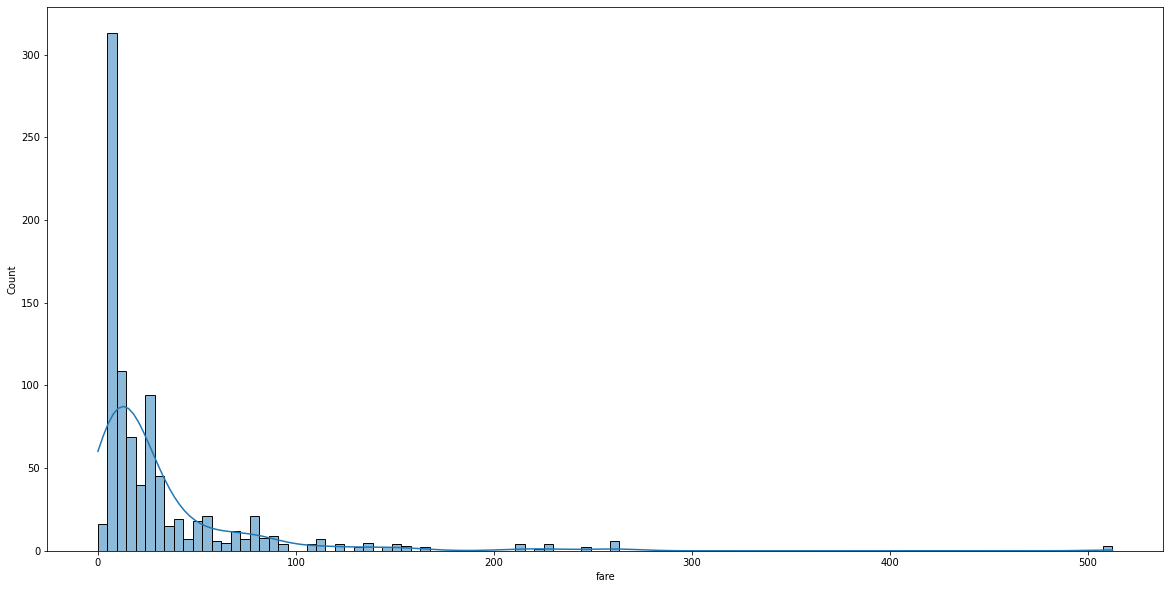

In [56]:
for col in df.select_dtypes('float'):
    plt.figure(figsize=(20,10))
    sns.histplot(data=df[col], fill=True, kde=True)

In [57]:
for col in df.select_dtypes('object'):
    print(f'{col :<50} {df[col].unique()}')

sex                                                ['male' 'female']
embarked                                           ['S' 'C' 'Q' nan]
who                                                ['man' 'woman' 'child']
embark_town                                        ['Southampton' 'Cherbourg' 'Queenstown' nan]
alive                                              ['no' 'yes']


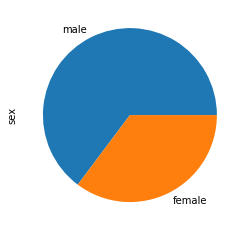

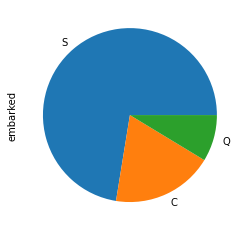

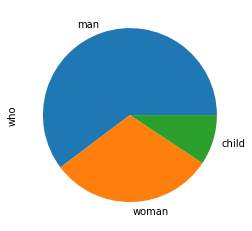

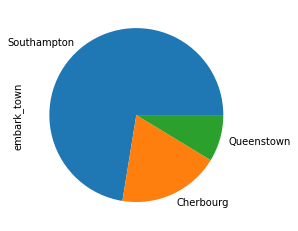

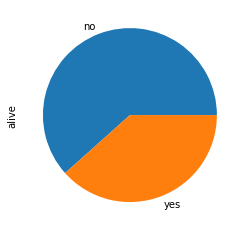

In [58]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

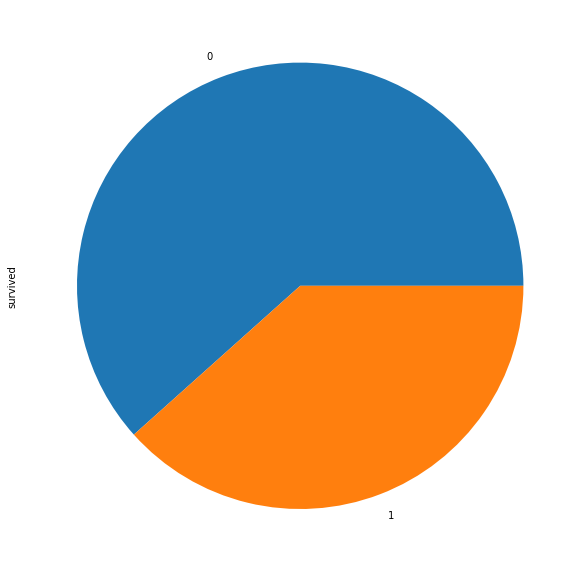

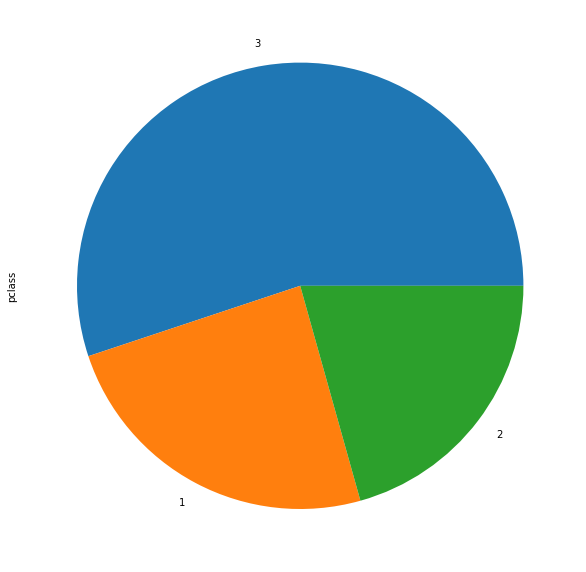

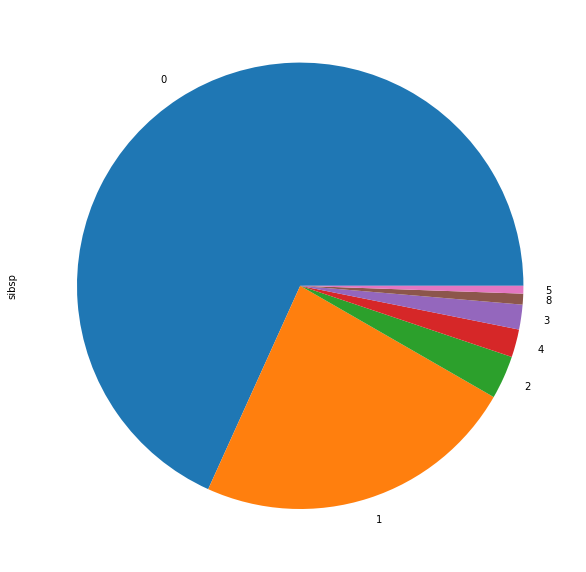

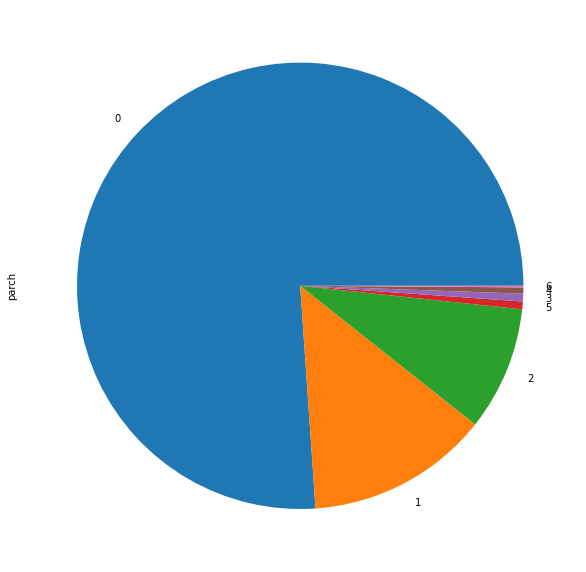

In [59]:
for col in df.select_dtypes('int'):
    plt.figure(figsize=(10, 20))
    df[col].value_counts().plot.pie()

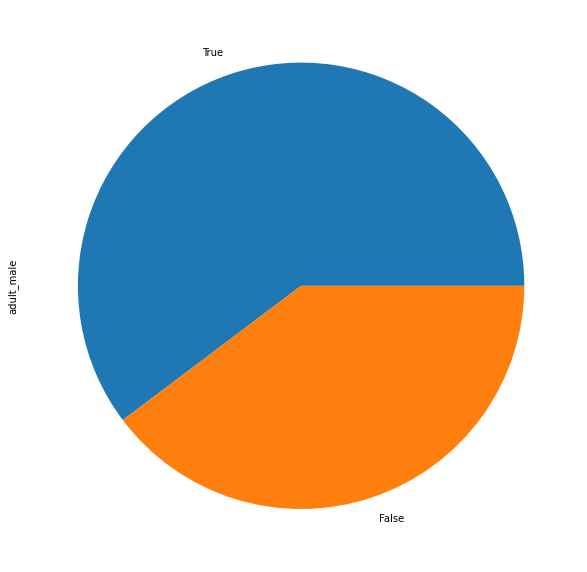

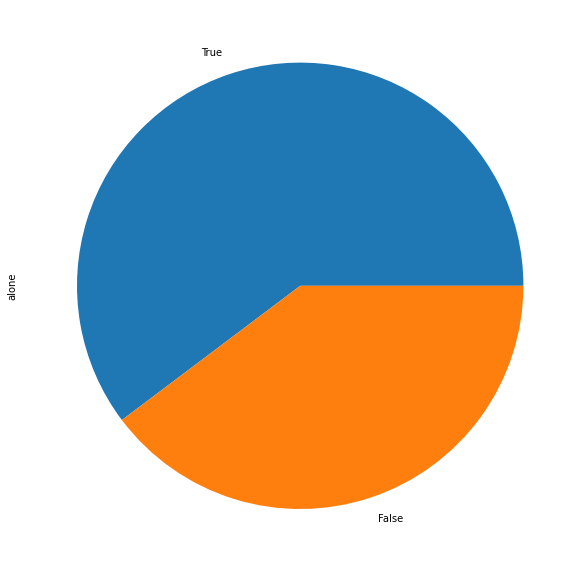

In [64]:
for col in df.select_dtypes('bool'):
    plt.figure(figsize=(10, 20))
    df[col].value_counts().plot.pie()

In [65]:
df_survived = df[df['survived'] == 1]
df_died = df[df['survived'] == 0]

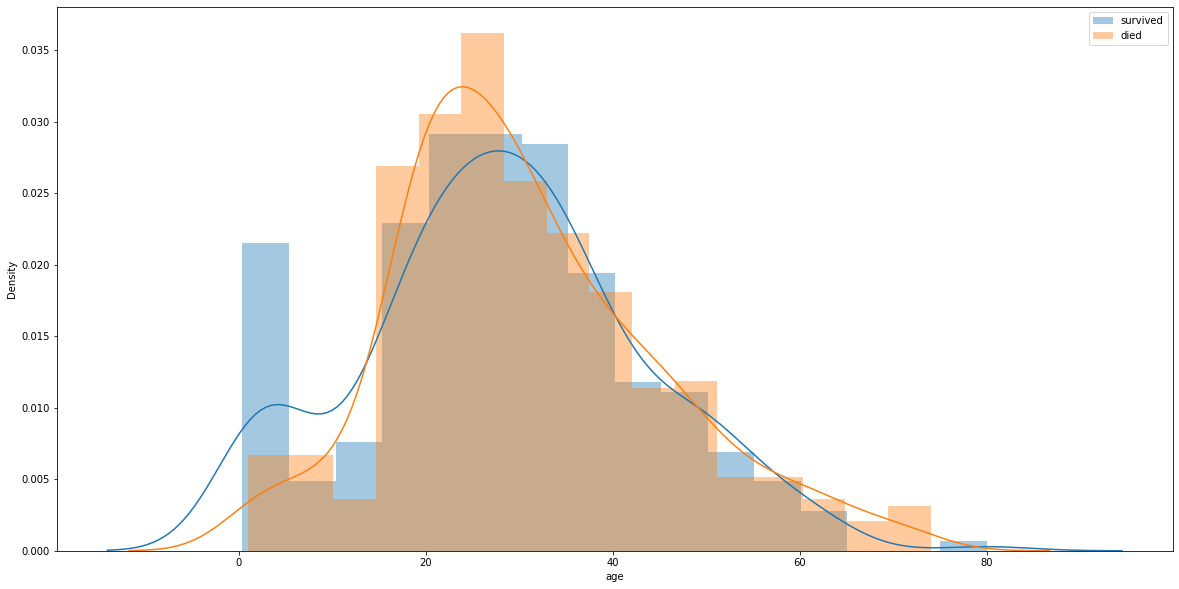

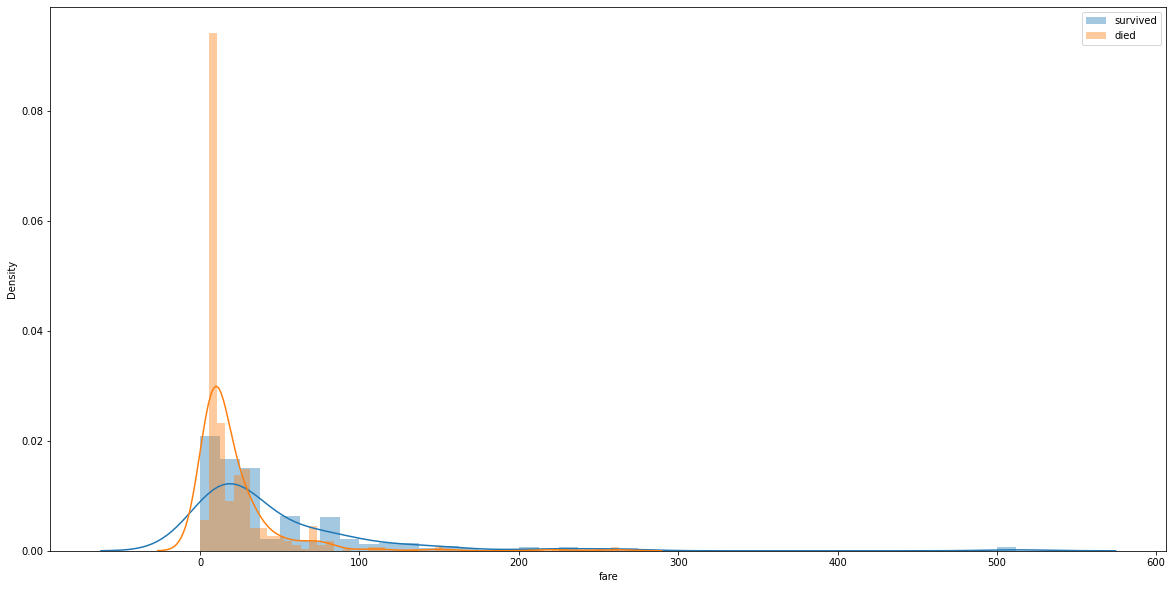

In [66]:
for col in df.select_dtypes('float'):
    plt.figure(figsize=(20,10))
    sns.distplot(df_survived[col], label='survived')
    sns.distplot(df_died[col], label='died')
    plt.legend()

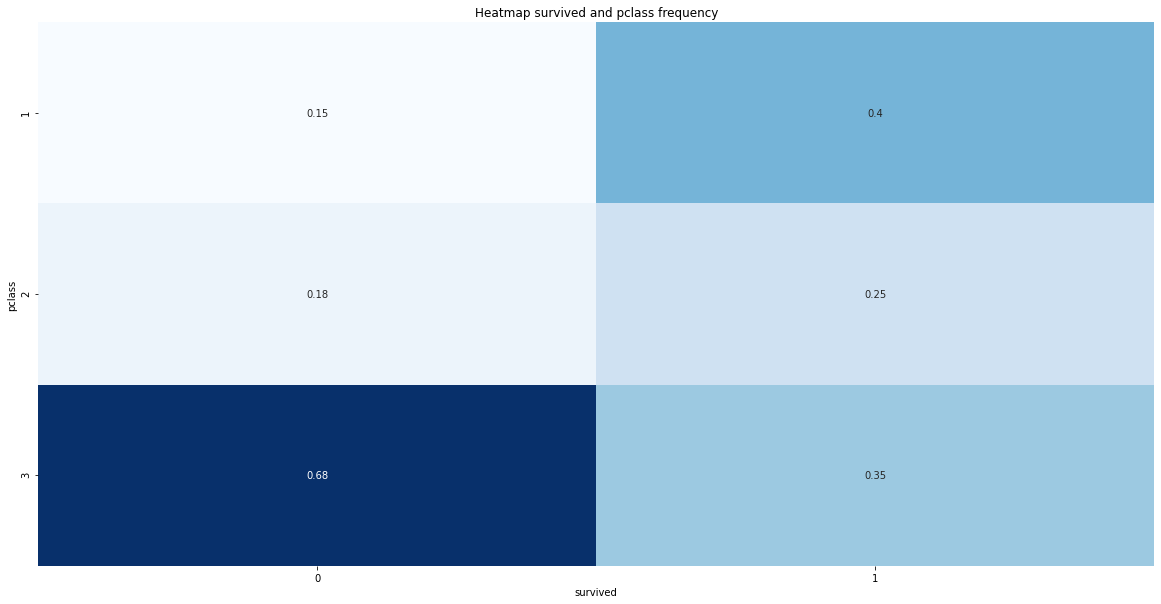

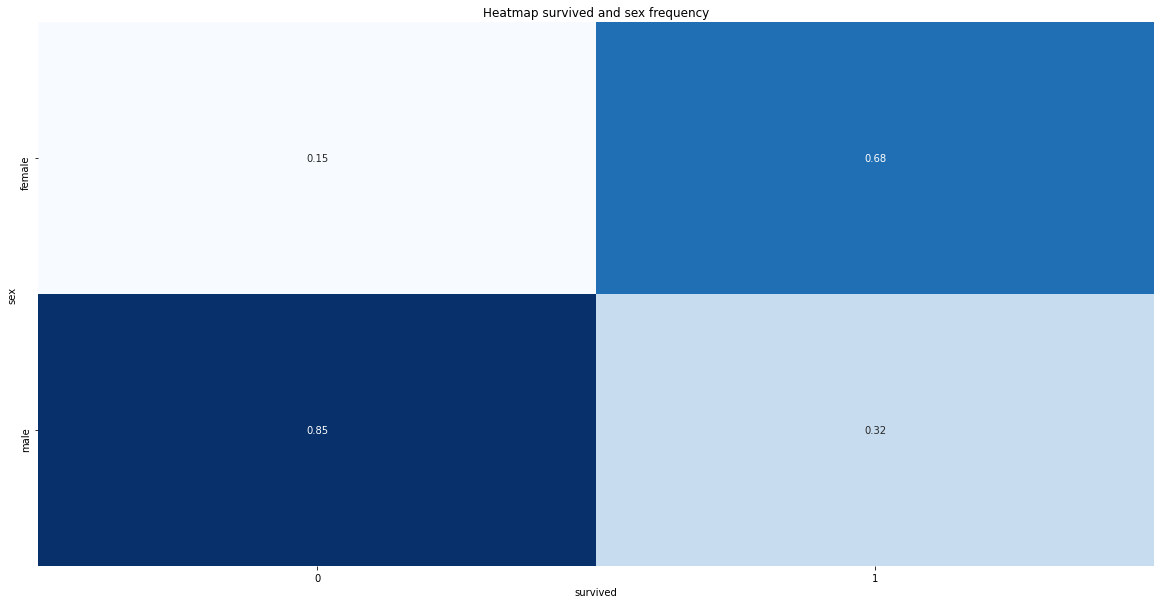

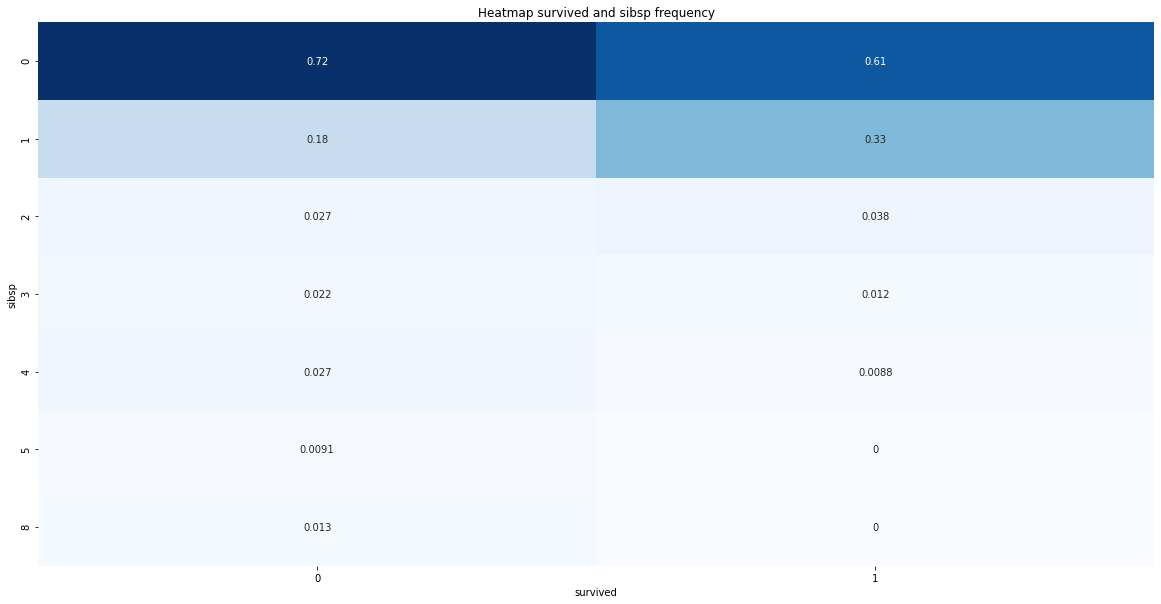

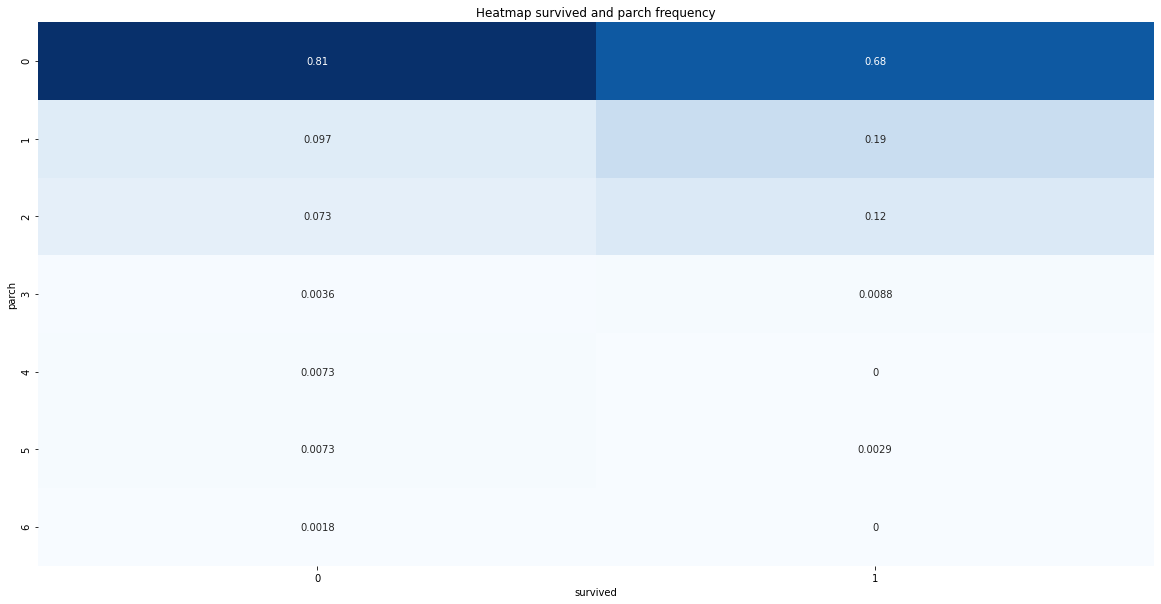

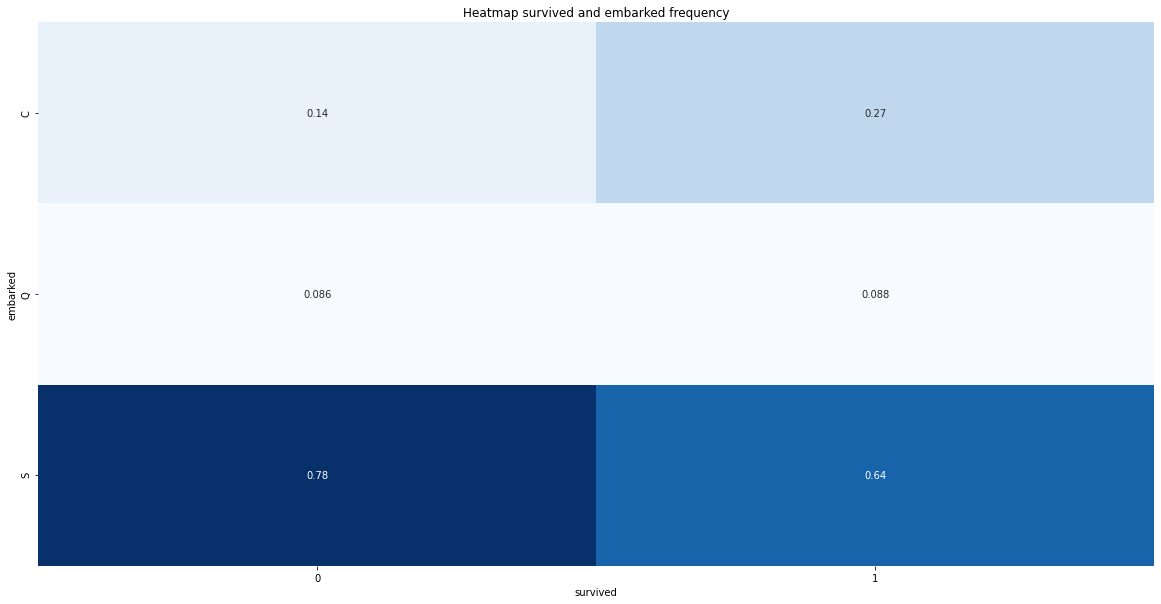

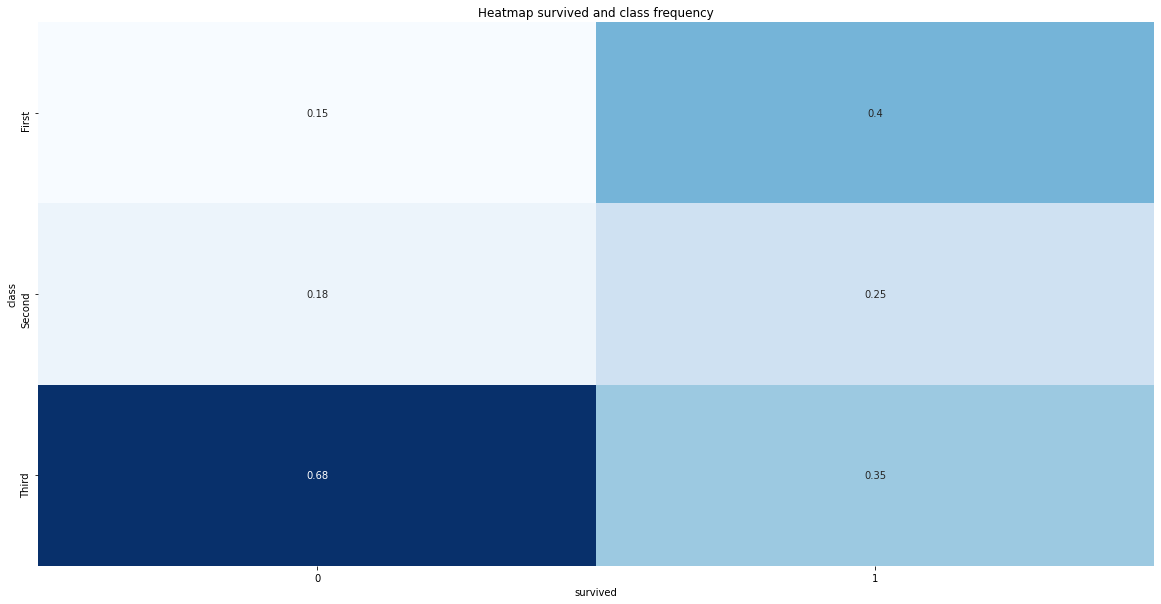

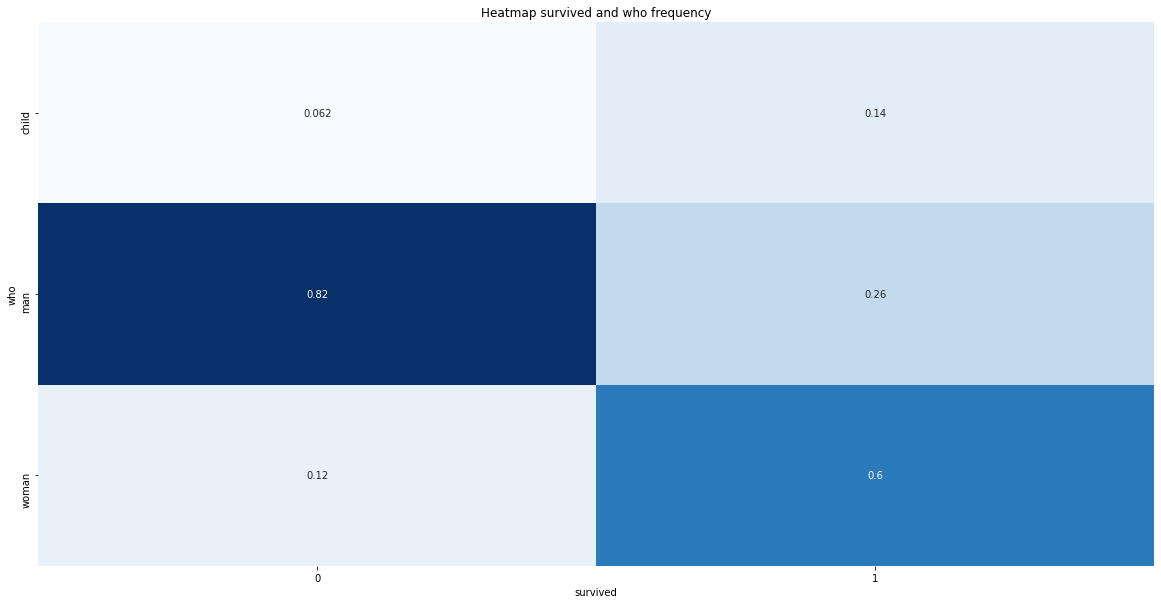

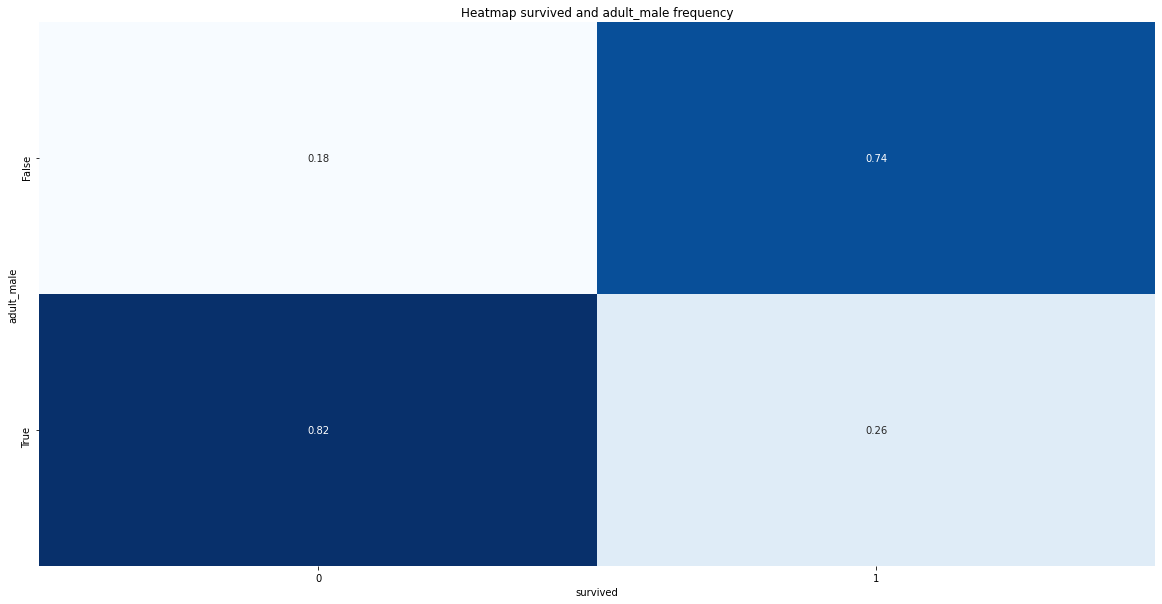

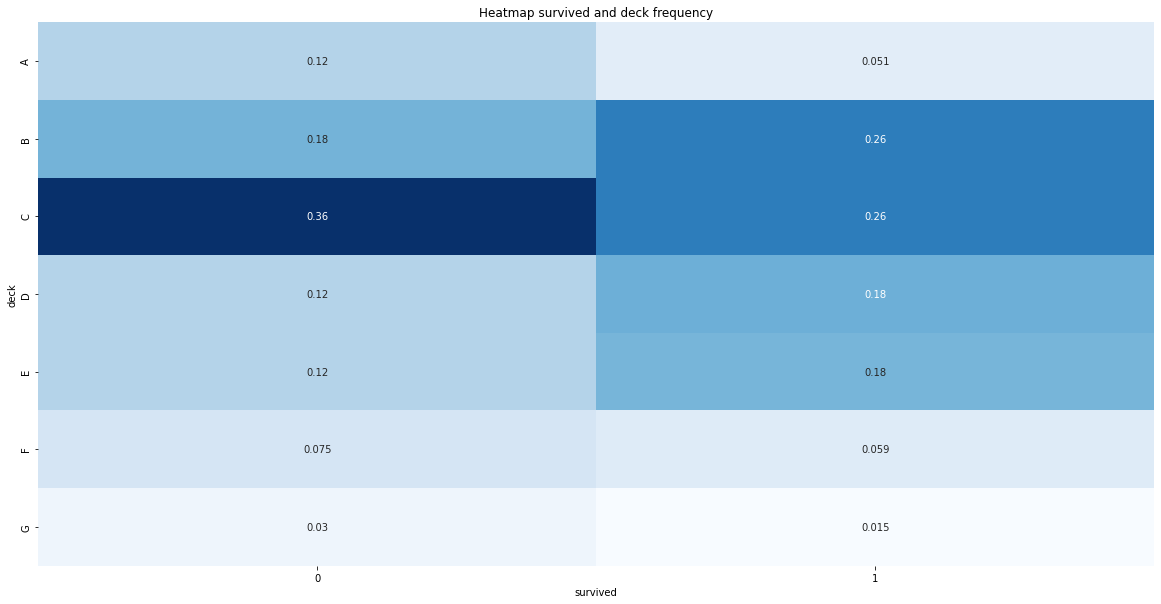

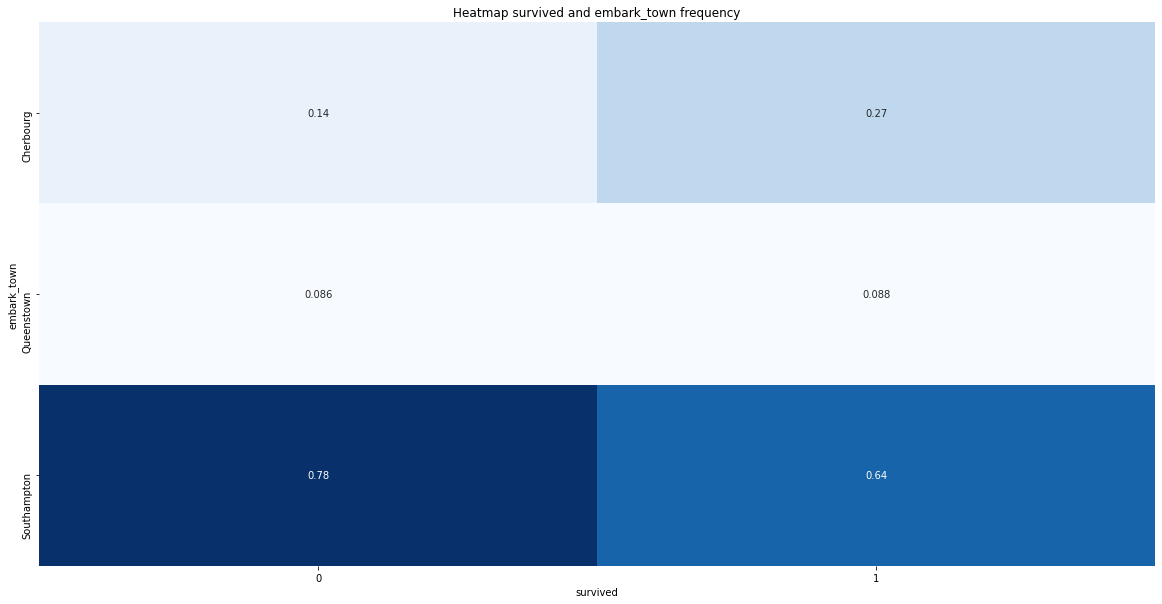

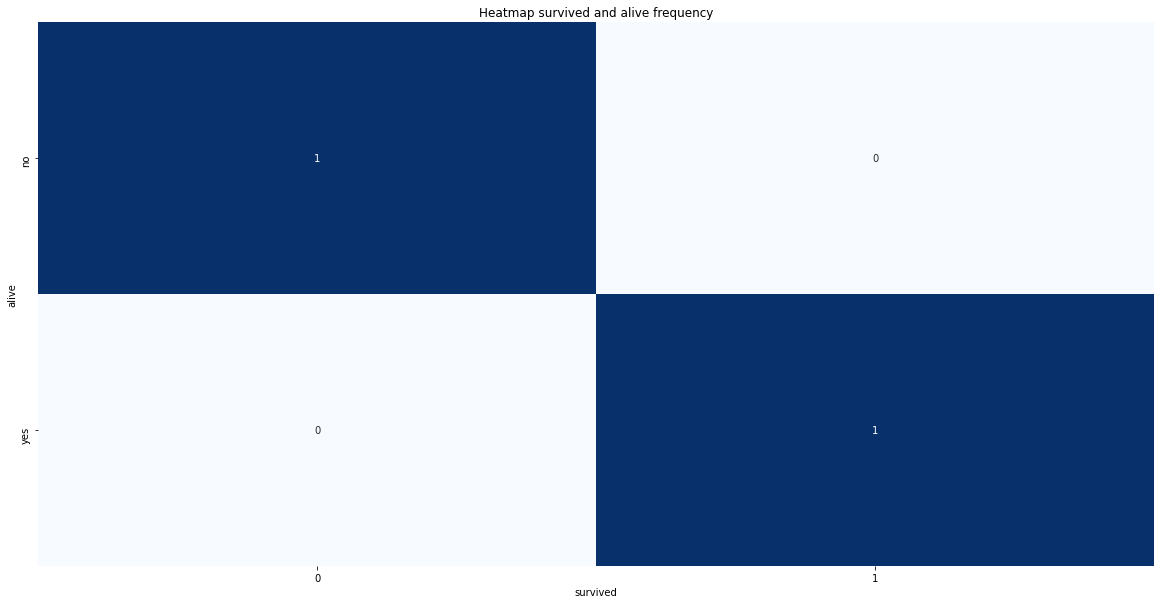

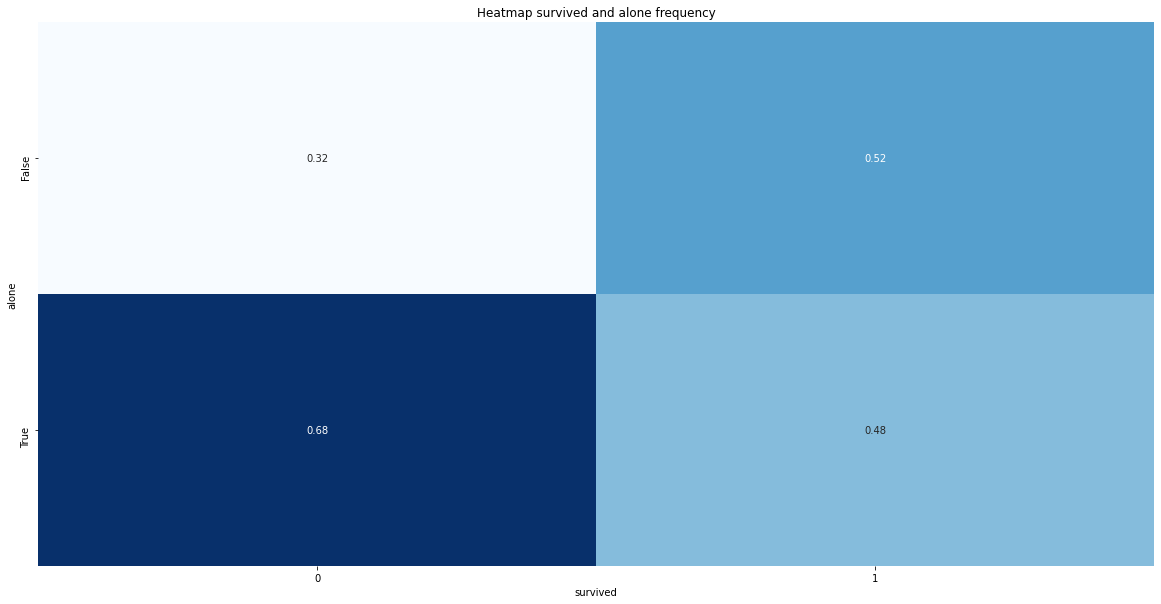

In [67]:
for col in df.drop(columns=['survived'] + list(df.select_dtypes('float'))):
    temp = pd.crosstab(df[col], df['survived'])
    temp = temp/temp.sum(axis=0)
    plt.figure(figsize=(20,10))
    sns.heatmap(temp, annot=True, cmap='Blues', cbar=False)
    plt.title('Heatmap survived and {} frequency'.format(col))
    plt.show()

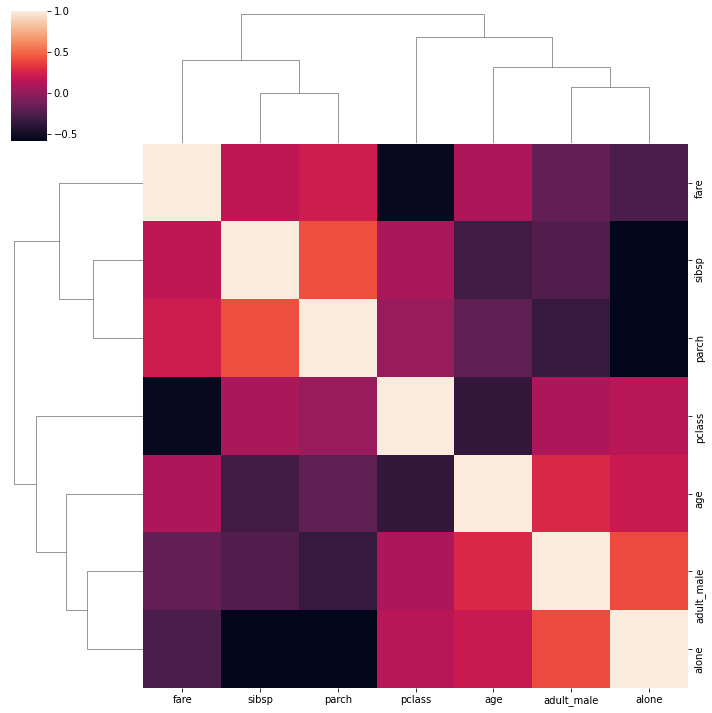

In [68]:
sns.clustermap(df.drop(columns='survived').corr())

In [69]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
def classes(df):
    if df['pclass'] == 1:
        return 'First'
    elif df['pclass'] == 2:
        return 'Second'
    elif df['pclass'] == 3:
        return 'Third'
    else:
        return 'Unknown'

In [74]:
df['status'] = df.apply(classes, axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,status
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third


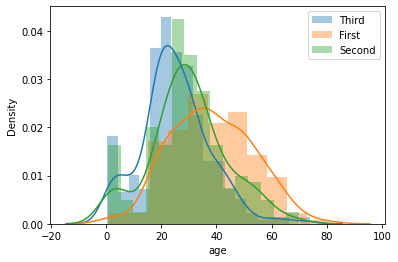

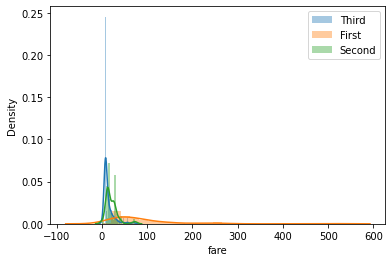

In [77]:
for col in df.select_dtypes('float'):
    plt.figure()
    for cat in df['status'].unique():
        sns.distplot(df[df['status'] == cat][col], label=cat)
    plt.legend()

In [79]:
df.shape

(891, 16)

In [80]:
df.dropna().count()

survived       182
pclass         182
sex            182
age            182
sibsp          182
parch          182
fare           182
embarked       182
class          182
who            182
adult_male     182
deck           182
embark_town    182
alive          182
alone          182
status         182
dtype: int64

In [82]:
df['deck'].count()

203

In [83]:
df['age'].count()

714

In [84]:
df_age = df['age']
df_age['survived'] = df['survived']
df_age.dropna()['survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64